In [100]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

- Find the linear regression equation for mileage vs price.
- Chart the original data and the equation on the chart.

In [101]:
retail_price_data = pd.read_csv("car_data.csv")

#### Plotting given data and Linear Regression Line

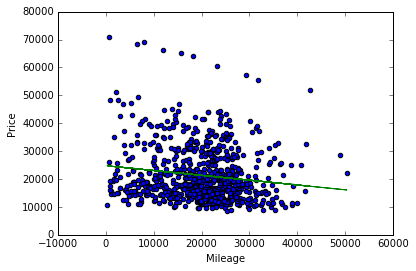

In [102]:
feature_cols = ['Mileage']
X = retail_price_data[feature_cols]
y = retail_price_data['Price']

linreg = LinearRegression()
linreg.fit(X, y)

plt.scatter(X, y)
plt.plot(X, linreg.predict(X), color = 'green')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [103]:
print('Intercept:', linreg.intercept_)
print('Coefficient:', linreg.coef_)

Intercept: 24764.5590061
Coefficient: [-0.1725205]


The linear regression equation is: $y = -0.17*x + 24764.6$ 

- Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [104]:
print('R-squared Score:', linreg.score(X, y))

R-squared Score: 0.0204634473235


Result: The calculated $R^2$ score is very low (weak correlation), wich means that the equation is not a good fit for this data.

Lets find the $R^2$ score using Polynomial Linear Regression algorithm using different degrees.

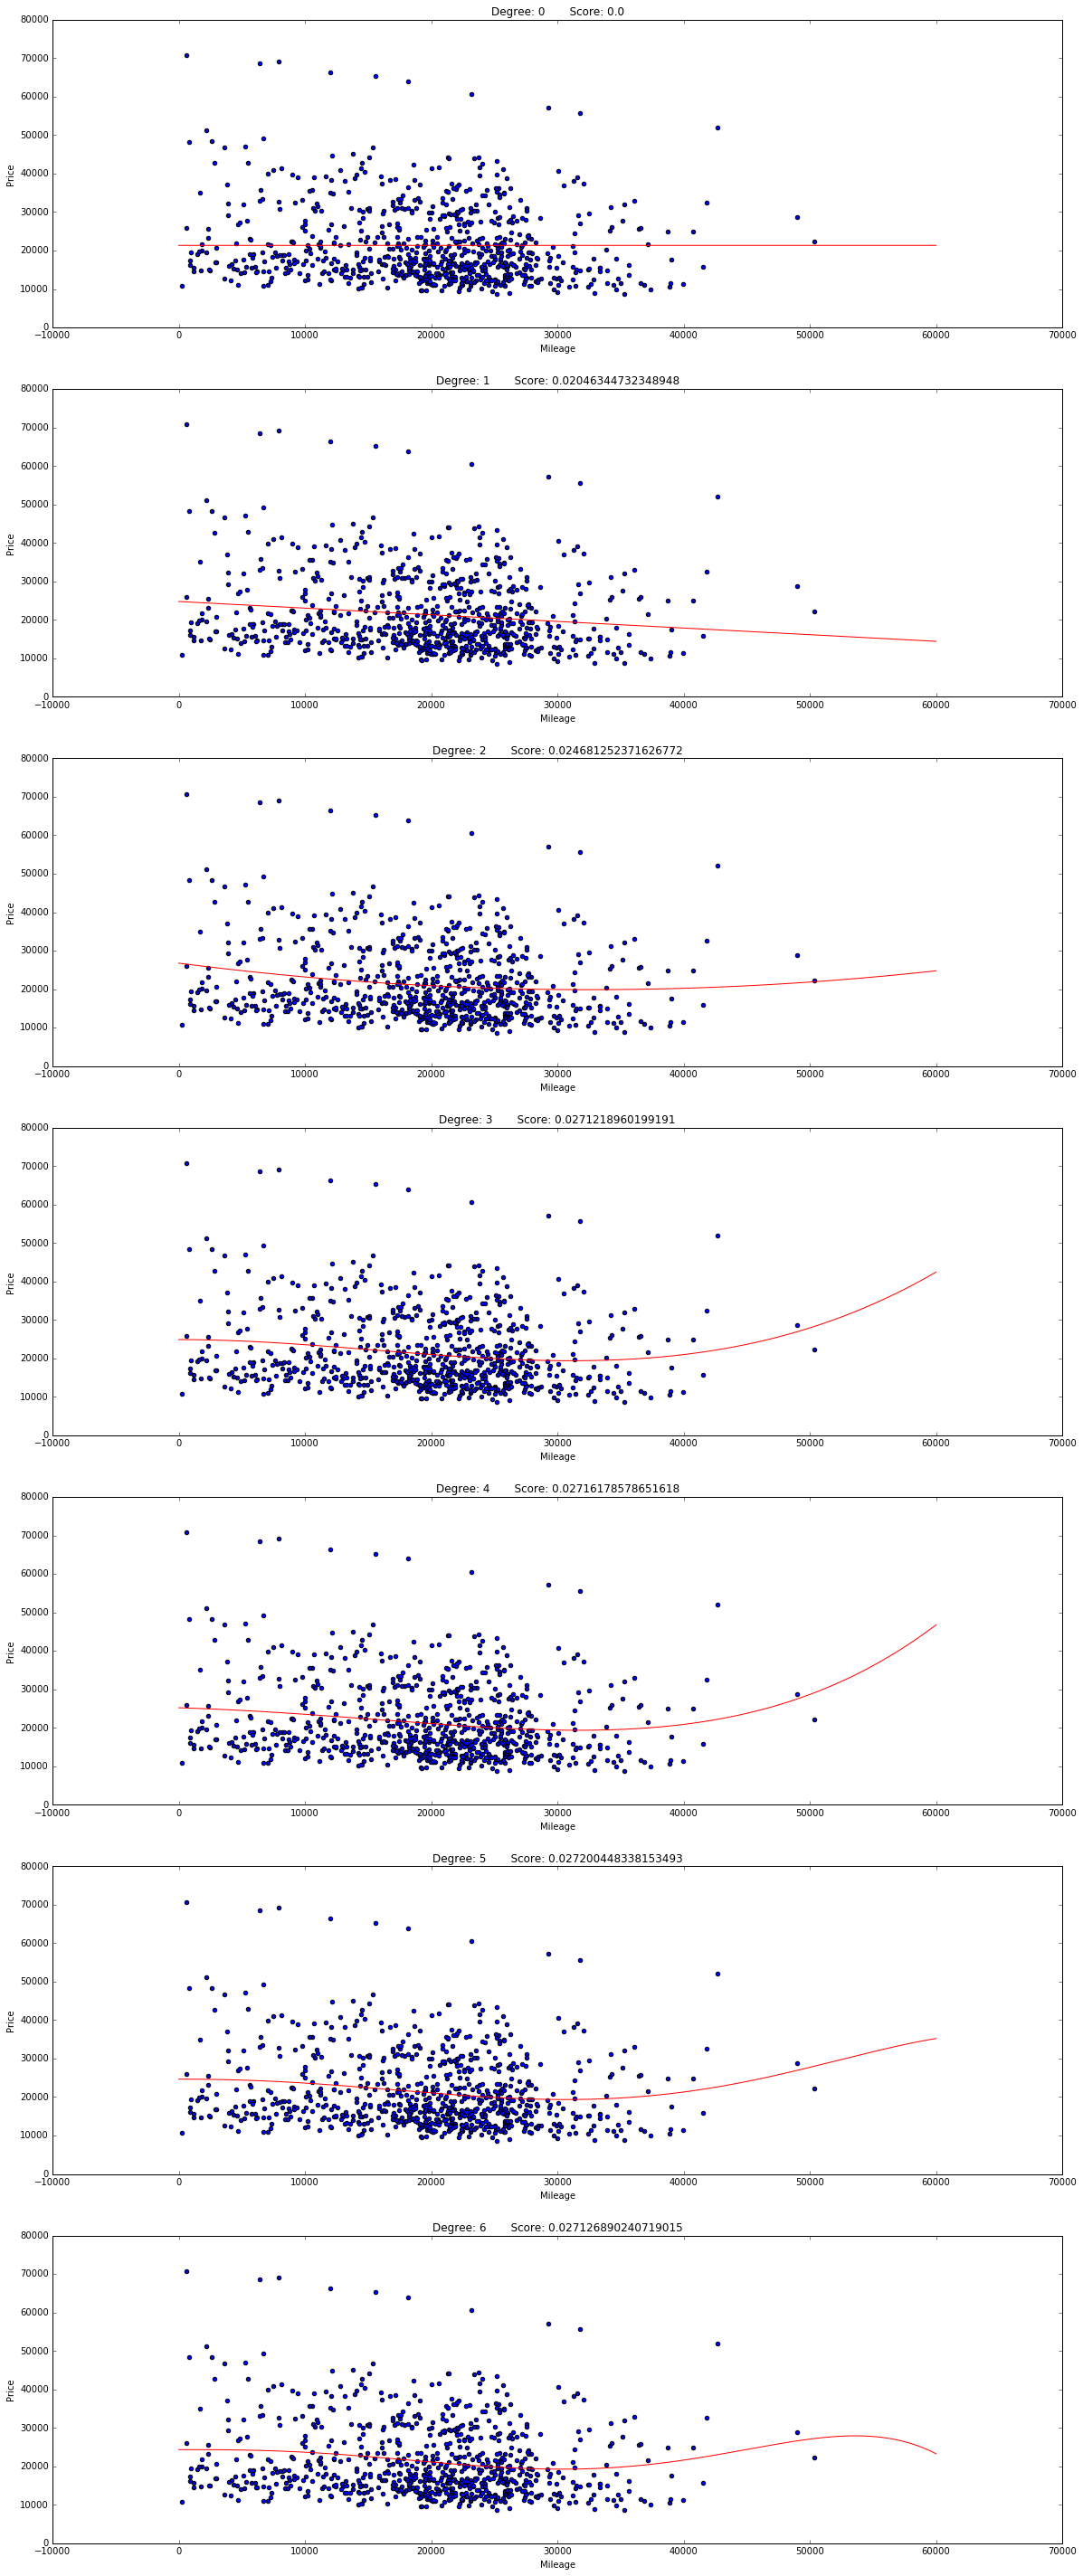

In [105]:
feature_cols = ['Mileage']
X = retail_price_data[feature_cols]
y = retail_price_data['Price']

degrees = 7
fig, axs = plt.subplots(degrees, figsize = (20, 50))
linreg = LinearRegression()

for degree in range(degrees):
    
    model = make_pipeline(PolynomialFeatures(degree), linreg)
    model.fit(X, y)

    subplot = axs[degree]
    subplot.scatter(X, y)
    xs = range(60000)
    subplot.plot(xs, model.predict([[k] for k in xs]), color='red')
    r_score = model.score(X, y)
    subplot.set_xlabel('Mileage')
    subplot.set_ylabel('Price')
    subplot.set_title('Degree: {}       Score: {}'.format(degree, r_score))

Result: Using Polynomial Linear Regression with degrees from 1 to 6 the best $R^2$ score (0.02720) is with degree = 5. However, the difference between $R^2$ scores in Linear Regression and Polynomial Linear Regression is 0.00674. Both scores show weak correlation, wich means that both equations are not a good fit for this data.

## Tasks, Part 2

- Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [106]:
columns = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
X = retail_price_data[columns]
y = retail_price_data['Price']

linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [107]:
print('Intercept:', linreg.intercept_)
print('Coefficient:', linreg.coef_)

Intercept: 6758.7551436
Coefficient: [ -1.69747832e-01   3.79237893e+03  -7.87220732e+02  -1.54274585e+03
   6.28899715e+03  -1.99379528e+03   3.34936162e+03]


The linear regression equation is: 
$ y = -0.17*x(Mileage) + 3792.4*x(Cylinder) - 787.2*x(Liter) - 1542.7*x(Doors) + 6288.9*x(Cruise) - 1993.8*x(Sound) - 3349.4*x(Leather) + 6758.8 $ 

- Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [108]:
print('Score:', linreg.score(X, y))

Score: 0.446264353673


Result: The calculated $R^2$ score is not high enough to be considered as a strong correlation.

- Find the combination of the factors that is the best predictor for price.

In [109]:
combinations_list = []
for item in range(1, 8):
    combinations_list.append(itertools.combinations(columns, item))

my_score = 0
for item in combinations_list:
    for columns in item:
        columns = list(columns)
        x_price = retail_price_data[columns]
        price_linreg = LinearRegression()
        price_linreg.fit(x_price, y)
        if my_score < price_linreg.score(x_price, y):
            my_score = price_linreg.score(x_price, y)
print(columns, '\nBest R-squared Score:', my_score)

['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] 
Best R-squared Score: 0.446264353673


In [110]:
#retail_price_data['Make'].value_counts()

In [111]:
#retail_price_data['Model'].value_counts()

In [112]:
#retail_price_data['Type'].value_counts()

## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [113]:
df_with_dummies = pd.get_dummies(retail_price_data, columns = ['Make', 'Model', 'Type'])

In [114]:
columns = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Make_Buick', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Cadillac', 'Make_Saturn','Type_Sedan', 'Type_Coupe', 'Type_Wagon', 'Type_Hatchback', 'Type_Convertible']
X = df_with_dummies[columns]
y = df_with_dummies['Price']

linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [115]:
print('Intercept:', linreg.intercept_)
print('Coefficient:', linreg.coef_)
print('Score:', linreg.score(X, y))

Intercept: 23983.7719096
Coefficient: [ -1.84862466e-01  -1.22610774e+03   5.76120797e+03  -2.06693208e+03
   1.11145653e+02   2.95622523e+02   2.34258573e+02  -3.58669276e+03
  -5.33495094e+03  -5.47974129e+03   6.95098389e+03   1.22732515e+04
  -4.82285042e+03  -1.69110942e+03  -5.49471851e+03   2.37758514e+03
  -1.71994175e+03   6.52818455e+03]
Score: 0.936388995104


Result: By converting the categorical variables Make, Model and Type into dummy variables the calculated $R^2$ score shows a strong correlation 0.936.